In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip7_BF_20241015\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)


,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.100054,7.442404,1.570494e-07,51468.484776,104.848642,58249.331018,141.960222,442128.415754,8195.513134,-68.393580,0.000033
1,101,-110.0,0.099959,7.454006,2.029918e-07,37386.755981,70.283596,47343.299577,94.585647,177773.779769,1387.489876,-70.269728,0.000027
2,102,-110.0,0.100018,7.511317,1.526505e-07,33739.910748,41.892508,36910.824208,57.224452,392747.367638,6268.172842,-70.080158,0.000017
3,103,-110.0,0.100020,7.517113,2.014497e-07,30513.546806,44.261136,32930.875737,60.325621,415681.045736,9214.125189,-70.457678,0.000023
4,104,-110.0,0.100061,7.526346,2.259030e-07,27446.154074,39.593279,29117.629225,57.677504,478120.741159,14848.962767,-70.843429,0.000025
...,...,...,...,...,...,...,...,...,...,...,...,...,...
116,96,-110.0,0.100073,7.310518,1.442357e-07,41402.402712,62.074263,45254.464525,84.393365,486400.181458,9564.050599,-69.187602,0.000020
117,97,-110.0,0.100037,7.321512,2.223844e-07,19521.067486,19.360758,18678.565303,32.962815,-432788.829842,12378.423204,-71.874863,0.000014
118,98,-110.0,0.099955,7.382114,1.945935e-07,25958.568194,31.001269,27431.076532,45.976558,483577.207995,13630.048029,-71.068313,0.000019
119,99,-110.0,0.100025,7.394538,1.454442e-07,39190.656091,55.235885,42755.365397,75.690045,470055.389613,8940.395436,-69.417754,0.000019


In [3]:
def fit(x, a, b):
    return a*x**(-2)+b 

32
449630.46117201744 27631.069133700723


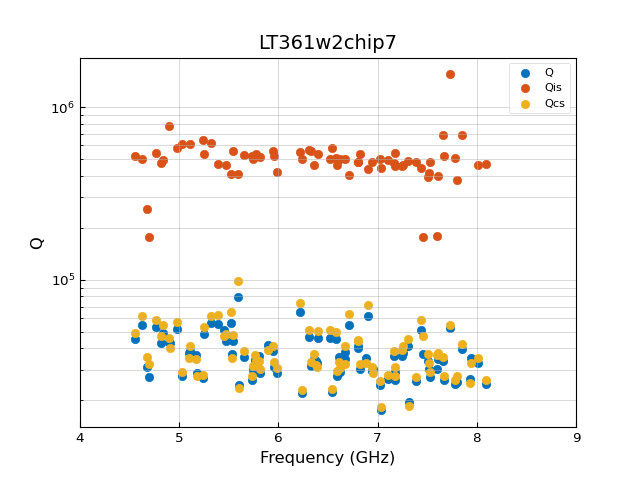

In [5]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots()
ax.set_title('LT361w2chip7')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
# ax.set_ylim(0, .5e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

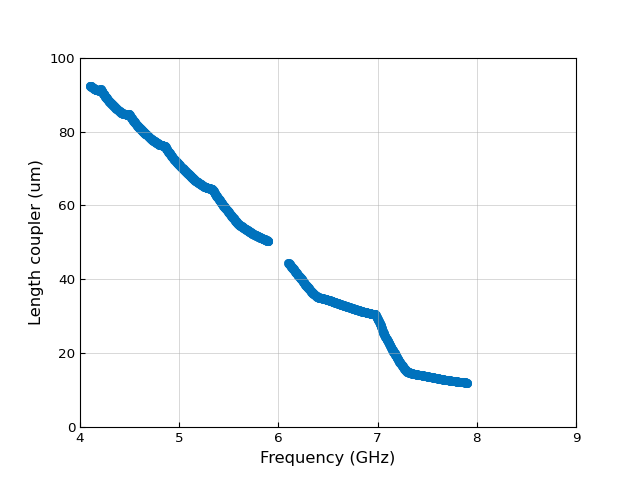

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')